In [2]:
# imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:

# Load the CSV file with headers
path = r"C:\Users\boba4\Box\Zach_repo\Projects\DA PMA\fiber photometry\GRABDA_PMAR_closedloop\cohort1_202230501\tone_pf_frz2.csv"
data = pd.read_csv(path, header=None)
data.head()

,0,1,2
0,DP065,1,0.635766
1,DP065,2,2.594810
2,DP065,3,12.344858
3,DP065,4,14.749319
4,DP066,1,9.336882


In [21]:
# add headers
data.columns=['ID','Day','Value']
data.head()

,ID,Day,Value
0,DP065,1,0.635766
1,DP065,2,2.594810
2,DP065,3,12.344858
3,DP065,4,14.749319
4,DP066,1,9.336882


(0.0, 100.0)

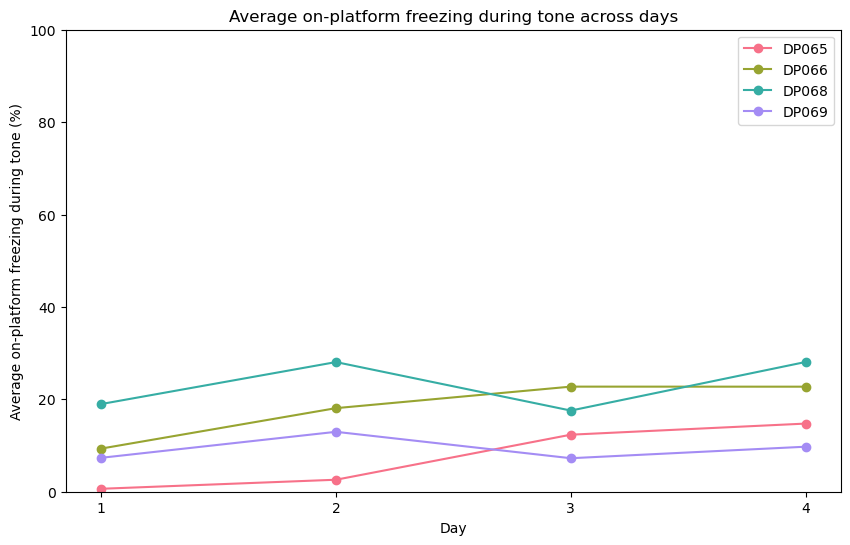

In [22]:
# Create a color palette with as many colors as there are unique Identifiers
palette = sns.color_palette("husl", len(data['ID'].unique()))

# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Loop over each unique Identifier with an associated color
for color, identifier in zip(palette, data['ID'].unique()):
    # Filter the data for this identifier
    data_id = data[data['ID'] == identifier]
    
    # Plot the data for this identifier with the associated color
    ax.plot(data_id['Day'], data_id['Value'], marker='o', color=color, label=identifier)

# Set labels and title
ax.set_xlabel('Day')
ax.set_ylabel('Average on-platform freezing during tone (%)')
ax.set_title('Average on-platform freezing during tone across days')

# Add a legend
ax.legend()

# Set xticks to be integers only
ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True))

# Set y-axis limit
ax.set_ylim(0, 100)

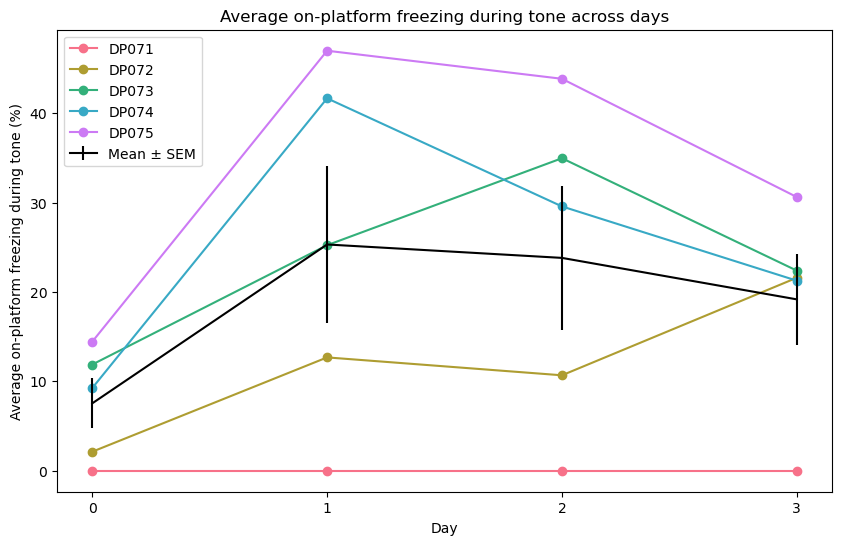

In [32]:
# Calculate mean and SEM
mean_values = data.groupby('Day')['Value'].mean()
sem_values = data.groupby('Day')['Value'].sem()

# Create a color palette with as many colors as there are unique Identifiers
palette = sns.color_palette("husl", len(data['ID'].unique()))

# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Loop over each unique Identifier with an associated color
for color, identifier in zip(palette, data['ID'].unique()):
    # Filter the data for this identifier
    data_id = data[data['ID'] == identifier]
    
    # Plot the data for this identifier with the associated color
    ax.plot(data_id['Day'], data_id['Value'], marker='o', color=color, label=identifier)

# Plot the mean and SEM
ax.errorbar(mean_values.index, mean_values, yerr=sem_values, color='black', label='Mean ± SEM')

# Set labels and title
ax.set_xlabel('Day')
ax.set_ylabel('Average on-platform freezing during tone (%)')
ax.set_title('Average on-platform freezing during tone across days')

# Add a legend
ax.legend()

# Set xticks to be integers only
ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True))

# Set y-axis limit
#ax.set_ylim(0, 1)

